# Für welche Titel und Verlage betragen die Ausleihen mehr als 75?

In [1]:
import urllib.request
import pandas as pd

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f453ddc9700>)

In [3]:
checkouts_df = pd.read_csv(checkout_file)

In [37]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,1,A rebel heart / Beth White.,"White, Beth, 1957-","Man woman relationships Fiction, Women plantat...","Revell, a division of Baker Publishing Group,",[2018]
9996,Physical,Horizon,BOOK,2020,1,1,Discover Scotland / this edition written and r...,"Wilson, Neil, 1959-",Scotland Guidebooks,"Lonely Planet,",2013.
9997,Physical,Horizon,BOOK,2020,1,1,The wolves / Alex Berenson.,"Berenson, Alex","Wells John Fictitious character Fiction, Unite...","G.P. Putnam's Sons,",[2016]
9998,Digital,OverDrive,AUDIOBOOK,2020,1,2,The Healing Code: 6 Minutes to Heal the Source...,Alexander Loyd,"Medical, New Age, Nonfiction",Hachette Audio,2011


In [12]:
checkouts_df.shape

(10000, 11)

In [13]:
checkouts_df.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

## Neue Titelspalte "titleShort" mit gekürzten Werten, später zum Plotten benötigt

In [16]:
checkouts_df["title"].str.slice(start=0, stop=30)

0                Harvest / Sam Inglis.
1                        The Race Beat
2                     I Can Cook Vegan
3                Follow the Stars Home
4                   Blood of Innocence
                     ...              
9995       A rebel heart / Beth White.
9996    Discover Scotland / this editi
9997       The wolves / Alex Berenson.
9998    The Healing Code: 6 Minutes to
9999    In the Woods: Dublin Murder Sq
Name: title, Length: 10000, dtype: object

In [17]:
checkouts_df["titleShort"] = checkouts_df["title"].str.slice(start=0, stop=30)

In [24]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear,titleShort
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.,Harvest / Sam Inglis.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008,The Race Beat
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019,I Can Cook Vegan
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012,Follow the Stars Home
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012,Blood of Innocence
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,1,A rebel heart / Beth White.,"White, Beth, 1957-","Man woman relationships Fiction, Women plantat...","Revell, a division of Baker Publishing Group,",[2018],A rebel heart / Beth White.
9996,Physical,Horizon,BOOK,2020,1,1,Discover Scotland / this edition written and r...,"Wilson, Neil, 1959-",Scotland Guidebooks,"Lonely Planet,",2013.,Discover Scotland / this editi
9997,Physical,Horizon,BOOK,2020,1,1,The wolves / Alex Berenson.,"Berenson, Alex","Wells John Fictitious character Fiction, Unite...","G.P. Putnam's Sons,",[2016],The wolves / Alex Berenson.
9998,Digital,OverDrive,AUDIOBOOK,2020,1,2,The Healing Code: 6 Minutes to Heal the Source...,Alexander Loyd,"Medical, New Age, Nonfiction",Hachette Audio,2011,The Healing Code: 6 Minutes to


## Anzeige der 50 höchsten Checkouts-Werte, Filterung nach Höchstwert=75

In [20]:
checkouts_df.sort_values(by=["checkouts"], ascending=False).head(50)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear,titleShort
5096,Digital,OverDrive,EBOOK,2020,1,546,Where the Crawdads Sing,Delia Owens,"Fiction, Literature","Penguin Group (USA), Inc.",2018,Where the Crawdads Sing
256,Physical,Horizon,BOOK,2020,1,355,Exhalation / Ted Chiang.,"Chiang, Ted","Science fiction, Short stories","Alfred A. Knopf,",2019.,Exhalation / Ted Chiang.
9106,Digital,OverDrive,EBOOK,2020,1,322,Little Fires Everywhere: A Novel,Celeste Ng,"Fiction, Literature","Penguin Group (USA), Inc.",2017,Little Fires Everywhere: A Nov
620,Digital,OverDrive,EBOOK,2020,1,218,Between the World and Me,Ta-Nehisi Coates,"African American Nonfiction, Biography & Autob...","Random House, Inc.",2015,Between the World and Me
4890,Digital,OverDrive,EBOOK,2020,1,190,Circe,Madeline Miller,"Classic Literature, Fiction, Historical Fiction","Hachette Digital, Inc.",2018,Circe
2254,Digital,OverDrive,EBOOK,2020,1,162,The Guardians: A Novel,John Grisham,"Fiction, Literature, Suspense, Thriller","Random House, Inc.",2019,The Guardians: A Novel
2897,Physical,Horizon,BOOK,2020,1,145,The night fire / Michael Connelly.,"Connelly, Michael, 1956-","Bosch Harry Fiction, Women detectives Californ...","Little, Brown and Company,",2019.,The night fire / Michael Conne
5199,Physical,Horizon,VIDEODISC,2020,1,120,Stuber / Twentieth Century Fox ; produced by J...,NaN,"Ridesharing Drama, Police pursuit driving Dram...","Twentieth Century Fox Home Entertainment,",[2019],Stuber / Twentieth Century Fox
5430,Digital,OverDrive,AUDIOBOOK,2020,1,114,"The Hunger Games: The Hunger Games Series, Boo...",Suzanne Collins,"Science Fiction, Thriller, Young Adult Fiction",Scholastic Inc. Audiobooks,2009,The Hunger Games: The Hunger G
4754,Digital,OverDrive,EBOOK,2020,1,108,The Fifth Risk,Michael Lewis,"Business, Nonfiction, Politics",W. W. Norton & Company,2018,The Fifth Risk


In [21]:
checkouts_df[checkouts_df["checkouts"] >= 75].sort_values(by=["checkouts"], ascending=False)

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear,titleShort
5096,Digital,OverDrive,EBOOK,2020,1,546,Where the Crawdads Sing,Delia Owens,"Fiction, Literature","Penguin Group (USA), Inc.",2018,Where the Crawdads Sing
256,Physical,Horizon,BOOK,2020,1,355,Exhalation / Ted Chiang.,"Chiang, Ted","Science fiction, Short stories","Alfred A. Knopf,",2019.,Exhalation / Ted Chiang.
9106,Digital,OverDrive,EBOOK,2020,1,322,Little Fires Everywhere: A Novel,Celeste Ng,"Fiction, Literature","Penguin Group (USA), Inc.",2017,Little Fires Everywhere: A Nov
620,Digital,OverDrive,EBOOK,2020,1,218,Between the World and Me,Ta-Nehisi Coates,"African American Nonfiction, Biography & Autob...","Random House, Inc.",2015,Between the World and Me
4890,Digital,OverDrive,EBOOK,2020,1,190,Circe,Madeline Miller,"Classic Literature, Fiction, Historical Fiction","Hachette Digital, Inc.",2018,Circe
2254,Digital,OverDrive,EBOOK,2020,1,162,The Guardians: A Novel,John Grisham,"Fiction, Literature, Suspense, Thriller","Random House, Inc.",2019,The Guardians: A Novel
2897,Physical,Horizon,BOOK,2020,1,145,The night fire / Michael Connelly.,"Connelly, Michael, 1956-","Bosch Harry Fiction, Women detectives Californ...","Little, Brown and Company,",2019.,The night fire / Michael Conne
5199,Physical,Horizon,VIDEODISC,2020,1,120,Stuber / Twentieth Century Fox ; produced by J...,NaN,"Ridesharing Drama, Police pursuit driving Dram...","Twentieth Century Fox Home Entertainment,",[2019],Stuber / Twentieth Century Fox
5430,Digital,OverDrive,AUDIOBOOK,2020,1,114,"The Hunger Games: The Hunger Games Series, Boo...",Suzanne Collins,"Science Fiction, Thriller, Young Adult Fiction",Scholastic Inc. Audiobooks,2009,The Hunger Games: The Hunger G
4754,Digital,OverDrive,EBOOK,2020,1,108,The Fifth Risk,Michael Lewis,"Business, Nonfiction, Politics",W. W. Norton & Company,2018,The Fifth Risk


In [22]:
checkouts_75_df = checkouts_df[checkouts_df["checkouts"] >= 75].sort_values(by=["checkouts"], ascending=False)

In [23]:
checkouts_75_df [["checkouts", "titleShort", "publisher"]]

,checkouts,titleShort,publisher
5096,546,Where the Crawdads Sing,"Penguin Group (USA), Inc."
256,355,Exhalation / Ted Chiang.,"Alfred A. Knopf,"
9106,322,Little Fires Everywhere: A Nov,"Penguin Group (USA), Inc."
620,218,Between the World and Me,"Random House, Inc."
4890,190,Circe,"Hachette Digital, Inc."
2254,162,The Guardians: A Novel,"Random House, Inc."
2897,145,The night fire / Michael Conne,"Little, Brown and Company,"
5199,120,Stuber / Twentieth Century Fox,"Twentieth Century Fox Home Entertainment,"
5430,114,The Hunger Games: The Hunger G,Scholastic Inc. Audiobooks
4754,108,The Fifth Risk,W. W. Norton & Company


In [25]:
checkouts_75_df [["checkouts", "titleShort"]]

,checkouts,titleShort
5096,546,Where the Crawdads Sing
256,355,Exhalation / Ted Chiang.
9106,322,Little Fires Everywhere: A Nov
620,218,Between the World and Me
4890,190,Circe
2254,162,The Guardians: A Novel
2897,145,The night fire / Michael Conne
5199,120,Stuber / Twentieth Century Fox
5430,114,The Hunger Games: The Hunger G
4754,108,The Fifth Risk


In [26]:
checkouts_75_df [["checkouts", "publisher"]]

,checkouts,publisher
5096,546,"Penguin Group (USA), Inc."
256,355,"Alfred A. Knopf,"
9106,322,"Penguin Group (USA), Inc."
620,218,"Random House, Inc."
4890,190,"Hachette Digital, Inc."
2254,162,"Random House, Inc."
2897,145,"Little, Brown and Company,"
5199,120,"Twentieth Century Fox Home Entertainment,"
5430,114,Scholastic Inc. Audiobooks
4754,108,W. W. Norton & Company


## Graphische Darstellung: Ausleihen per Verlag

<AxesSubplot:title={'center':'Ausleihen höher als 75 per Verlag'}, ylabel='publisher'>

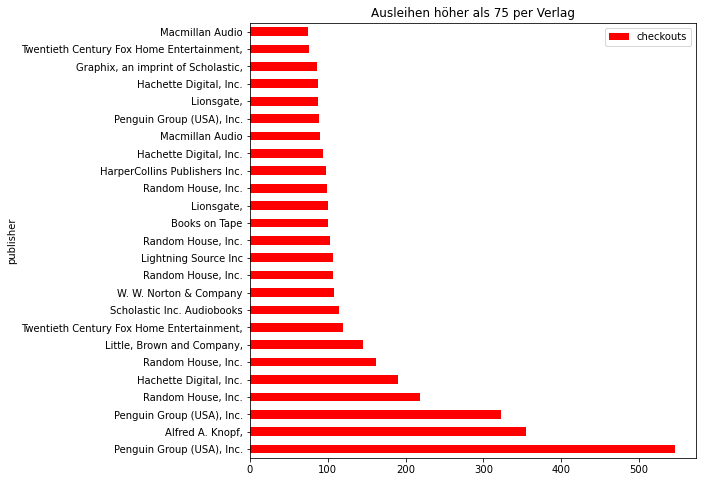

In [27]:
checkouts_75_df.plot(figsize=(8,8), kind="barh", x="publisher", y=("checkouts"), color="red", title="Ausleihen höher als 75 per Verlag", fontsize=10)

## Graphische Darstellung: Ausleihen per Titel

<AxesSubplot:title={'center':'Ausleihen höher als 75 per Titel'}, ylabel='titleShort'>

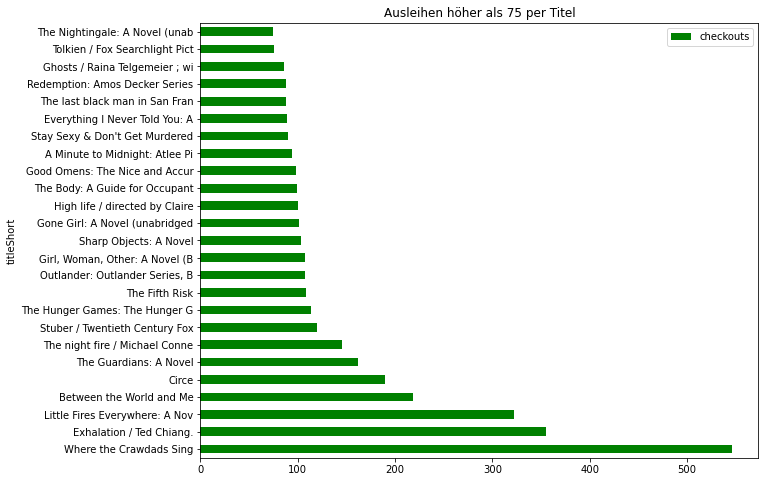

In [32]:
checkouts_75_df.plot(figsize=(10,8), kind="barh", title="Ausleihen höher als 75 per Titel", 
                     x="titleShort", y="checkouts", fontsize=10, color="green")